In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import glob

In [2]:
glob.glob("../../hadds/bdtInputs_Run2/*.root")

['../../hadds/bdtInputs_Run2/wz.root',
 '../../hadds/bdtInputs_Run2/ttz.root',
 '../../hadds/bdtInputs_Run2/ttw.root',
 '../../hadds/bdtInputs_Run2/tt2l.root',
 '../../hadds/bdtInputs_Run2/tt1l.root',
 '../../hadds/bdtInputs_Run2/ssww.root',
 '../../hadds/bdtInputs_Run2/vbshww.root',
 '../../hadds/bdtInputs_Run2/tth.root']

In [3]:
df = []
for sample in glob.glob("../../hadds/bdtInputs_Run2/*.root"):
    # Retrieve TTree
    f = uproot.open(sample)
    tree = f.get("variable")
    # Get BDT df
    temp_df = tree.pandas.df(branches=["BDT_*", "event_weight"])
    temp_df["sample_name"] = sample.split(".root")[0].split("/")[-1]
    df.append(temp_df)
    
df = pd.concat(df)
# Remove "MVA" prefix from column names
BDT_cols = df.columns[df.columns.str.contains("BDT_")]
rename_map = dict(zip(BDT_cols, BDT_cols.str.split("BDT_").str.get(1)))
df.rename(columns=rename_map, inplace=True)
# Make unique identifier for each event
df["unique_event_id"] = (df.sample_name
                         +"_run"+df.run.astype(str)
                         +"_lumi"+df.lumi.astype(str)
                         +"_event"+df.event.astype(str))
# Make bool for signal vs. bkg
df["is_signal"] = (df.sample_name == "vbshww")

In [4]:
df.event.nunique()

168698

In [5]:
df.head(15)

,run,event,lumi,MET_pt,MET_phi,ld_lep_flav,ld_lep_pt,ld_lep_eta,ld_lep_phi,ld_lep_reliso,...,ld_lep_tr_b_dR,ld_lep_tr_b_dphi,tr_lep_tr_b_pt,tr_lep_tr_b_M,tr_lep_tr_b_dR,tr_lep_tr_b_dphi,event_weight,sample_name,unique_event_id,is_signal
entry,,,,,,,,,,,,,,,,,,,,,
0,1,1768342,8844,70.270622,1.844971,-11,53.283558,-0.209839,-0.496155,0.000000,...,1.710791,1.363098,62.857693,40.840111,1.237870,0.985214,0.079833,wz,wz_run1_lumi8844_event1768342,False
1,1,1802687,9016,78.045654,2.030273,-13,43.433887,0.304382,-2.338379,0.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.079833,wz,wz_run1_lumi9016_event1802687,False
2,1,142566,713,20.549770,-2.429199,13,173.566284,-0.469482,-1.517090,0.000000,...,3.296027,1.323120,28.728449,103.717110,3.345509,2.384644,0.079833,wz,wz_run1_lumi713_event142566,False
3,1,143071,716,21.539217,-1.043945,-11,100.141113,2.022949,1.990723,0.000000,...,2.520294,1.794434,33.060974,60.589787,2.421347,1.689697,0.079833,wz,wz_run1_lumi716_event143071,False
4,1,976289,4883,69.400650,2.853027,-13,128.014999,0.694580,-2.006348,0.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.079833,wz,wz_run1_lumi4883_event976289,False
5,1,198775,995,102.265907,2.509766,-11,297.325592,2.048828,2.645508,0.000000,...,1.397413,0.251953,43.584633,22.929165,0.973204,0.696289,0.079833,wz,wz_run1_lumi995_event198775,False
6,1,891237,4458,168.312958,-0.011896,13,157.870087,2.170898,0.278748,0.000000,...,2.954783,0.287159,59.619389,80.232353,2.783527,2.746960,0.079833,wz,wz_run1_lumi4458_event891237,False
7,1,1467861,7341,100.761047,2.715332,-11,39.121479,-0.561890,-0.154449,0.000000,...,2.701742,1.824860,24.131140,68.646019,2.804347,2.186035,0.079833,wz,wz_run1_lumi7341_event1467861,False
8,1,561544,2809,7.204244,-2.514160,-13,108.529930,0.434143,0.987671,0.000000,...,1.109288,0.951782,67.281029,103.539856,2.257561,2.244873,0.079833,wz,wz_run1_lumi2809_event561544,False


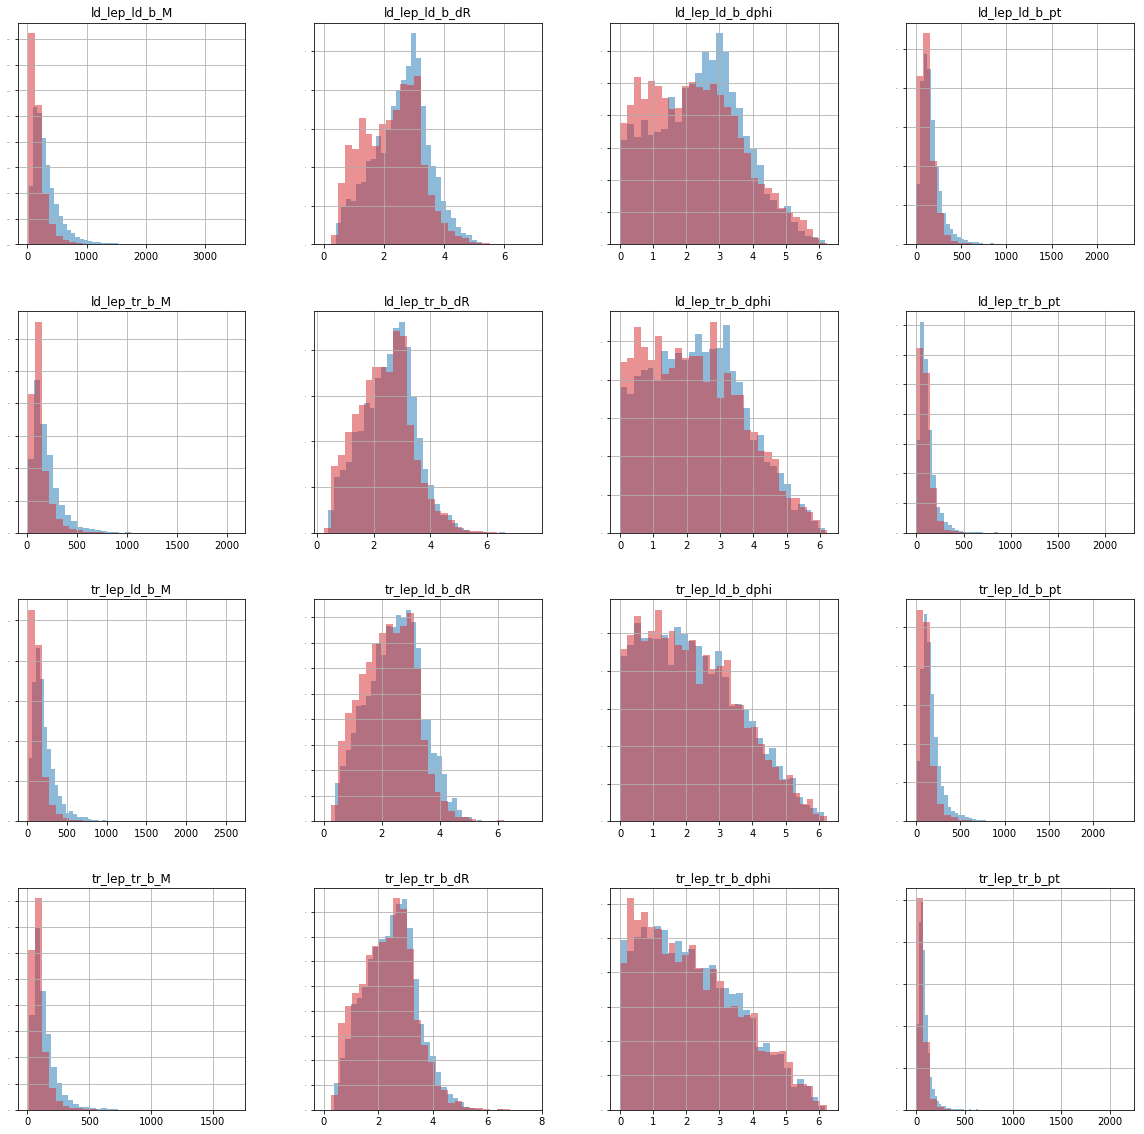

In [6]:
fig, axes = plt.subplots(4,4,figsize=(20,20))
is_lt2extrajets_col = df.columns.str.match(".._lep_.._b_*")
df[df.is_signal & (df.n_extrajets < 2)][df.columns[is_lt2extrajets_col]].hist(
    ax=axes.flatten()[:np.sum(is_lt2extrajets_col)], 
    weights=df[df.is_signal & (df.n_extrajets < 2)].event_weight,
    alpha=0.5, 
    color="C0", 
    ylabelsize=0, 
    density=True, 
    bins=30
);
df[~df.is_signal & (df.n_extrajets < 2)][df.columns[is_lt2extrajets_col]].hist(
    ax=axes.flatten()[:np.sum(is_lt2extrajets_col)], 
    weights=df[~df.is_signal & (df.n_extrajets < 2)].event_weight,
    alpha=0.5, 
    color="C3", 
    ylabelsize=0, 
    density=True, 
    bins=30
);
for row in axes:
    for col in row:
        col.set_ylim(bottom=0.)

In [25]:
def plot_S_vs_B(df, var, sig_selection, bkg_selection, bins=None, axes=None, normalized=True):
    if not axes:
        fig, axes = plt.subplots()
    axes.hist(
        np.clip(df[sig_selection][var], bins[0], bins[-1]),
        weights=np.clip(df[sig_selection].event_weight, bins[0], bins[-1]),
        color="C0",
        alpha=0.5,
        bins=bins,
        density=normalized,
        label="sig ({:0.3f} evts)".format(np.sum(df[sig_selection].event_weight))
    );
    axes.hist(
        np.clip(df[bkg_selection][var], bins[0], bins[-1]),
        weights=np.clip(df[bkg_selection].event_weight, bins[0], bins[-1]),
        color="C3",
        alpha=0.5,
        bins=bins,
        density=normalized,
        label="bkg ({:0.1f} evts)".format(np.sum(df[bkg_selection].event_weight))
    );
    axes.xaxis.set_minor_locator(AutoMinorLocator())
    axes.set_ylim(bottom=0.);
    axes.legend(prop={"size": 16});
    return

def plot_lep_b_correlations(df, lead_lep=True, lead_b=True):
    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    # Unpack axes
    ax1, ax2 = axes[0]
    ax3, ax4 = axes[1]
    # Assign labels
    var = ""
    labels = ("", "")
    if lead_lep and lead_b:
        var = "ld_lep_ld_b_"
        labels = ("leading", "leading")
    elif lead_lep and not lead_b:
        var = "ld_lep_tr_b_"
        labels = ("leading", "trailing")
    elif not lead_lep and lead_b:
        var = "tr_lep_ld_b_"
        labels = ("trailing", "leading")
    elif not lead_lep and not lead_b:
        var = "tr_lep_tr_b_"
        labels = ("trailing", "trailing")
    # Make signal/bkg selections
    sig = (df.is_signal & (df.n_extrajets < 2))
    bkg = (~df.is_signal & (df.n_extrajets < 2))
    # Plot pt (upper left)
    plot_S_vs_B(df, var+"pt", sig, bkg, bins=np.linspace(0, 600, 51), axes=ax1)
    ax1.set_xlabel(r"$p_{T}$(%s $\ell$ + %s $b$)" % labels, size=20);
    # Plot M (upper right)
    plot_S_vs_B(df, var+"M", sig, bkg, bins=np.linspace(0, 1000, 51), axes=ax2)
    ax2.set_xlabel(r"$M$(%s $\ell$ + %s $b$)" % labels, size=20);
    # Plot dR (lower left)
    plot_S_vs_B(df, var+"dR", sig, bkg, bins=np.linspace(0, 2*np.pi, 51), axes=ax3)
    ax3.set_xlabel(r"$\Delta R$(%s $\ell$, %s $b$)" % labels, size=20);
    # Plot dphi (lower right)
    plot_S_vs_B(df, var+"dphi", sig, bkg, bins=np.linspace(0, 2*np.pi, 51), axes=ax4)
    ax4.set_xlabel(r"$\Delta\phi$(%s $\ell$, %s $b$)" % labels, size=20);

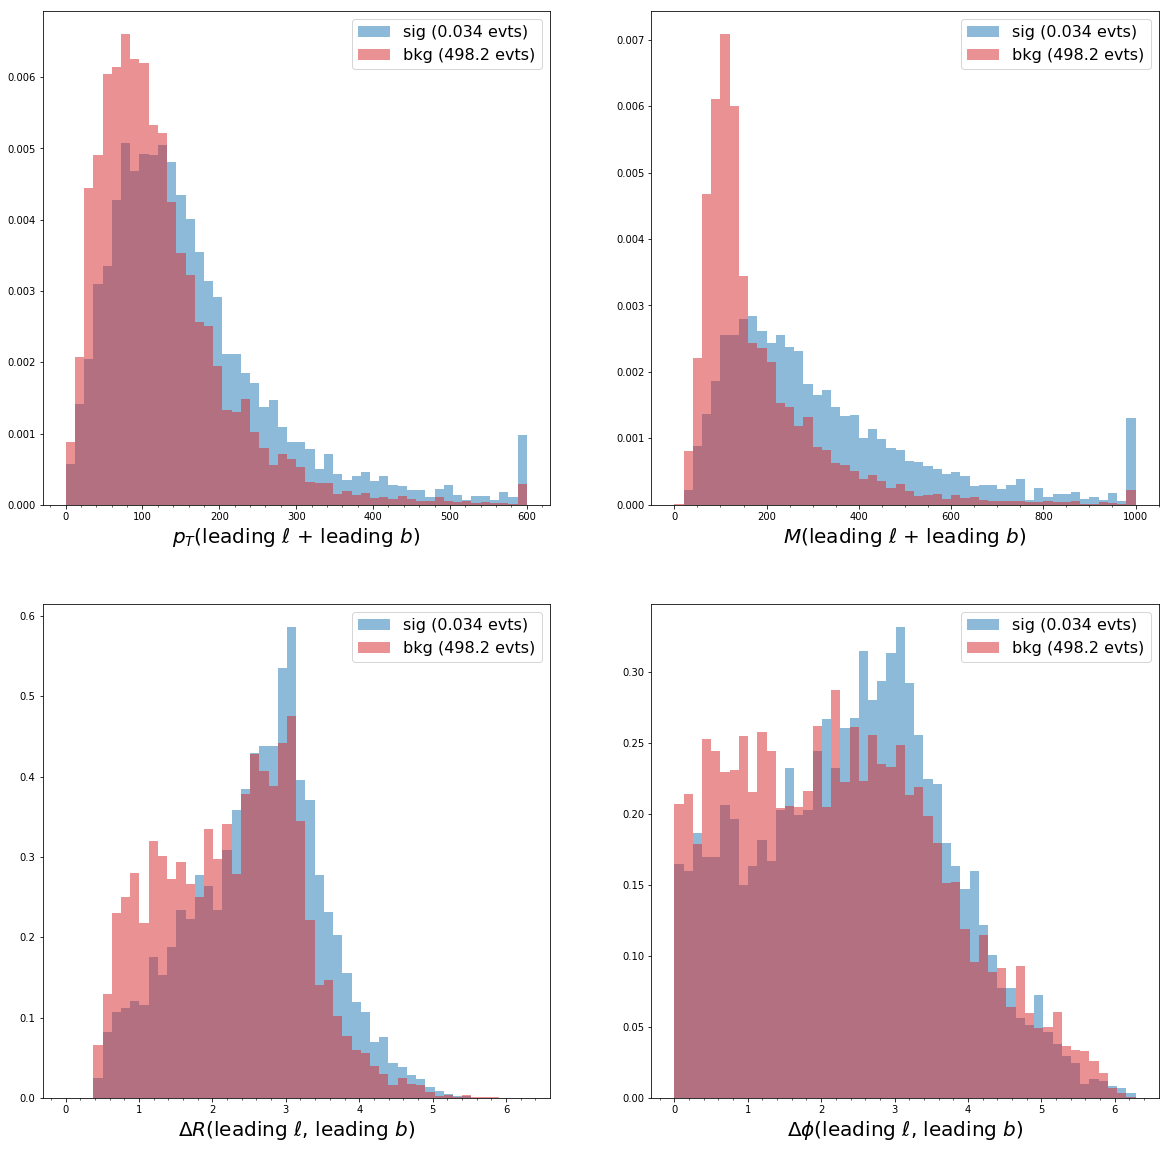

In [26]:
plot_lep_b_correlations(df, lead_lep=True, lead_b=True)

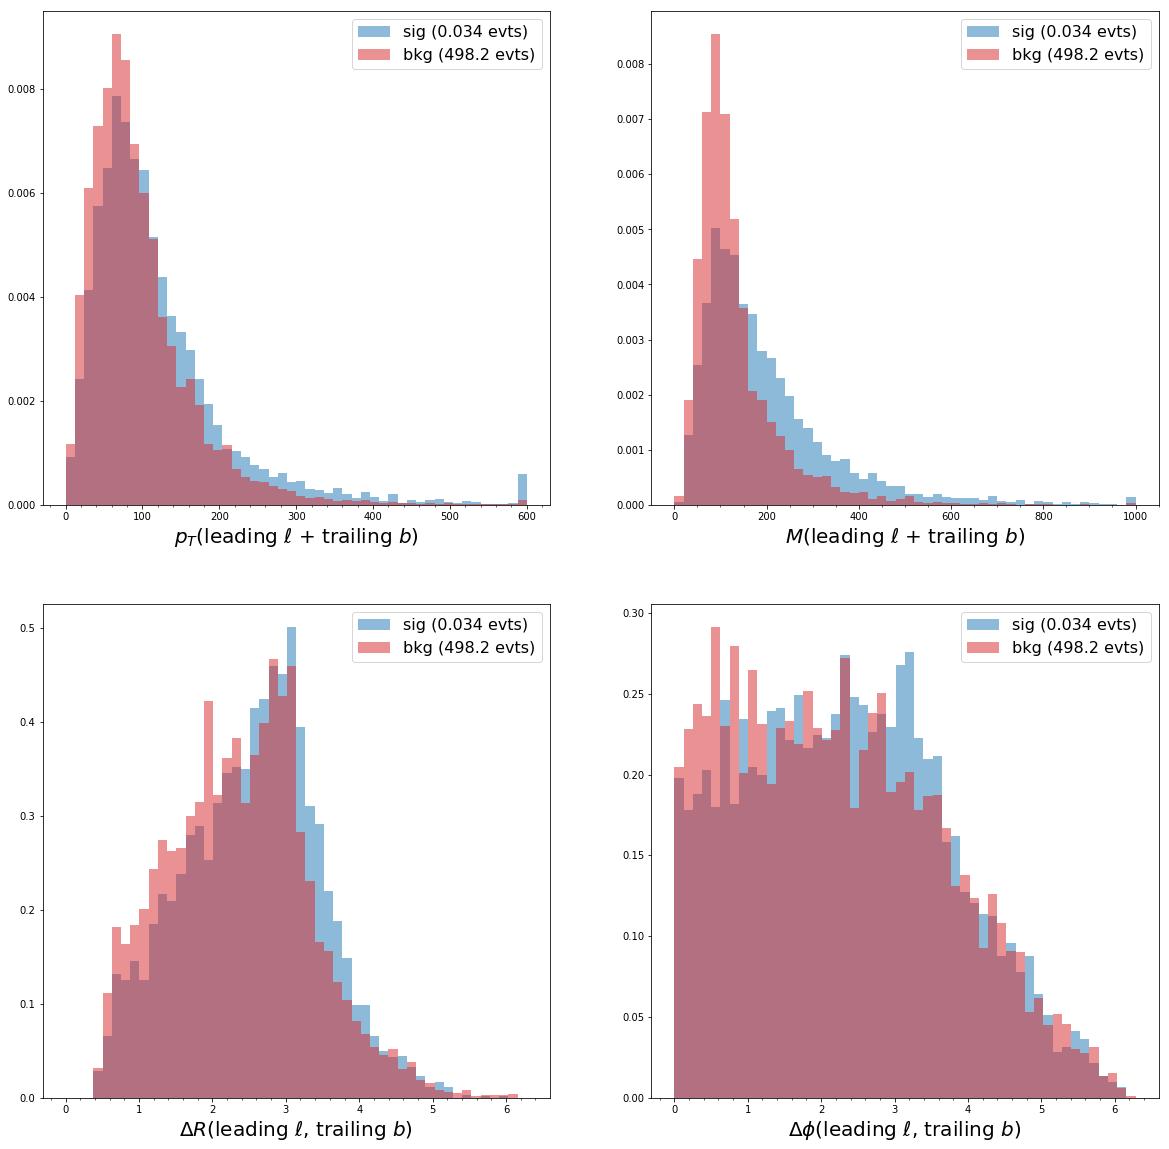

In [27]:
plot_lep_b_correlations(df, lead_lep=True, lead_b=False)

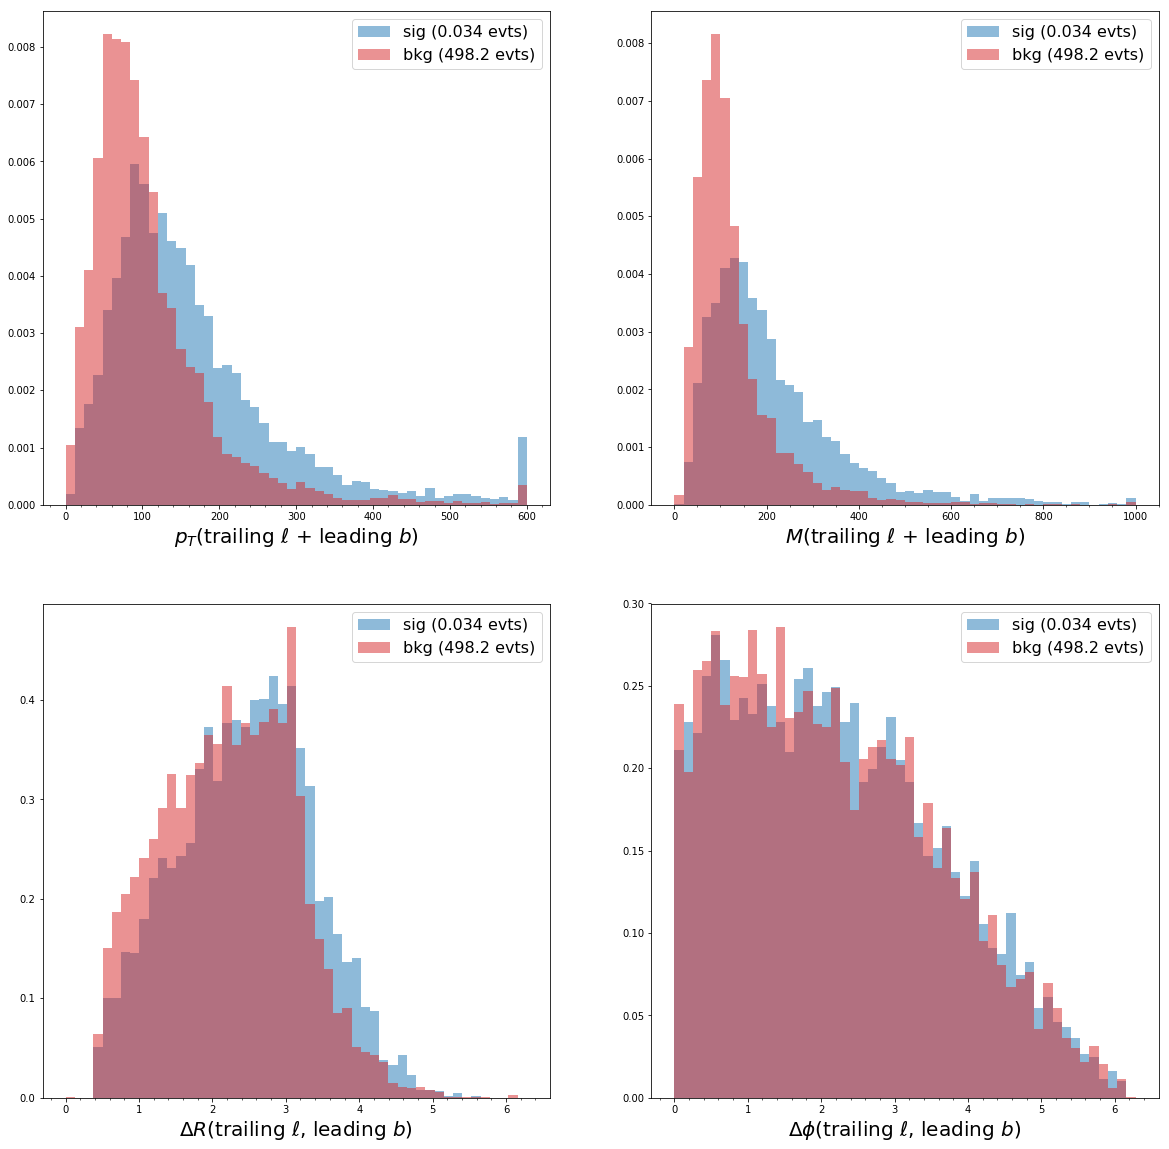

In [28]:
plot_lep_b_correlations(df, lead_lep=False, lead_b=True)

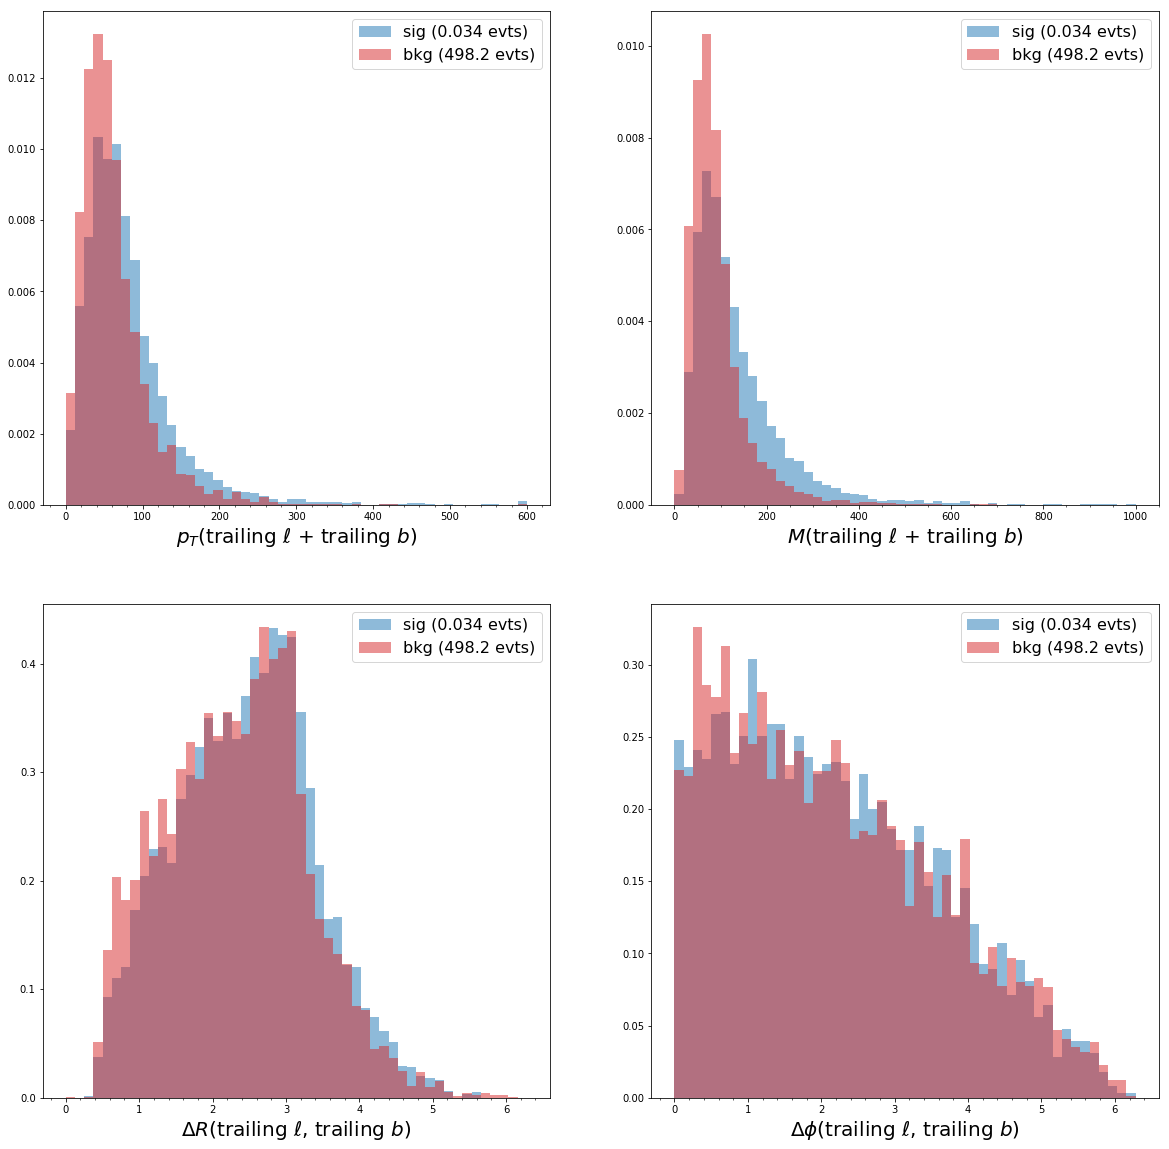

In [29]:
plot_lep_b_correlations(df, lead_lep=False, lead_b=False)

In [30]:
# Get bookkeeping columns to exclude in training
excludes = ["run", "event", "lumi", "sample_name", "event_weight", "unique_event_id", "is_signal"]
    
# Collect selected features
features = sorted(list(set(df.columns[~df.columns.str.match(".._lep_.._b_*")])-set(excludes)))

In [31]:
print("-- Features selected -- \n")
print("    "+"\n  + ".join(features))
print("  __"+"".join("_" for _ in range(max([len(s) for s in features]))))
print("  = {} total features".format(len(features)))

-- Features selected -- 

    MET_phi
  + MET_pt
  + W_hyp_M
  + W_hyp_dR
  + W_hyp_dphi
  + W_hyp_pt
  + bjet_pair_dR
  + bjet_pair_pt
  + ld_bjet_score
  + ld_lep_eta
  + ld_lep_flav
  + ld_lep_phi
  + ld_lep_pt
  + ld_lep_reliso
  + ld_vbsjet_P
  + n_extrajets
  + t_to_W_b_hyp_M
  + t_to_W_b_hyp_dR
  + t_to_W_b_hyp_dphi
  + t_to_W_b_hyp_pt
  + t_to_lep_b_hyp_M
  + t_to_lep_b_hyp_dR
  + t_to_lep_b_hyp_dphi
  + t_to_lep_b_hyp_pt
  + tr_bjet_score
  + tr_lep_eta
  + tr_lep_flav
  + tr_lep_phi
  + tr_lep_pt
  + tr_lep_reliso
  + tr_vbsjet_P
  + vbsjet_pair_M
  + vbsjet_pair_deta
  _____________________
  = 33 total features


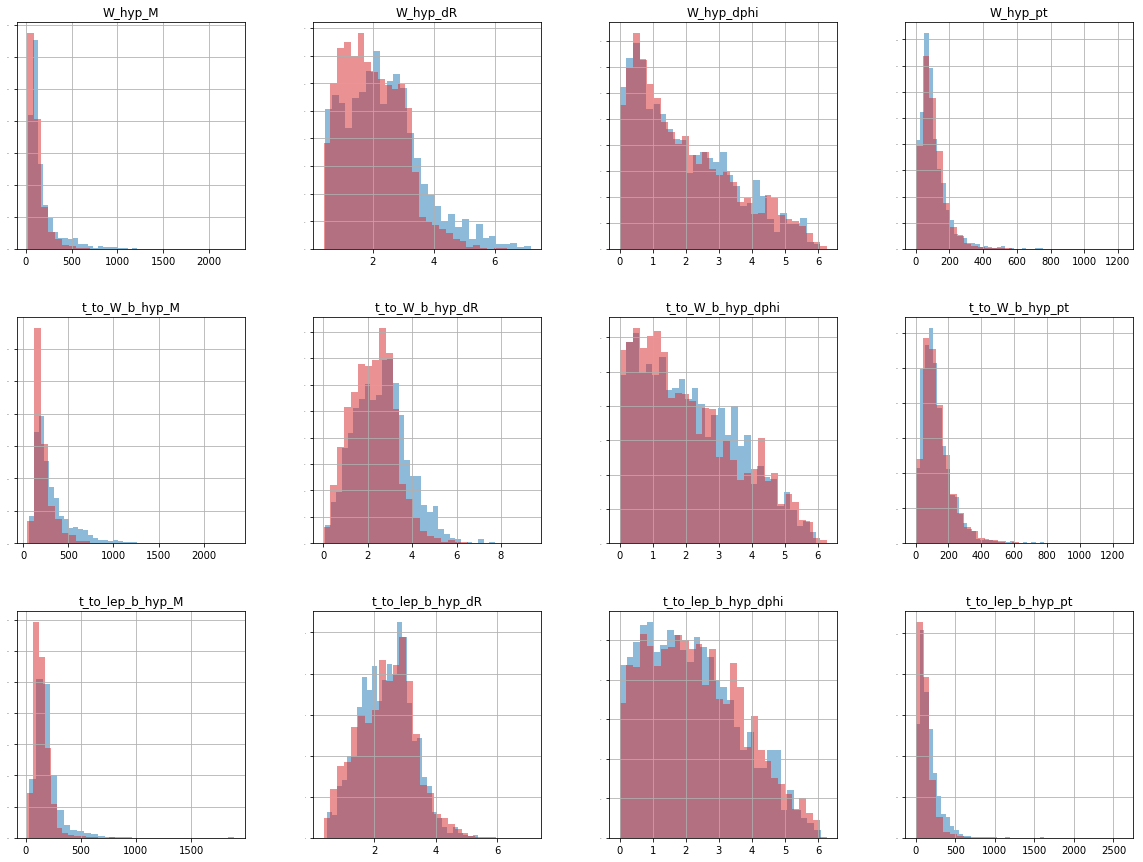

In [32]:
fig, axes = plt.subplots(3,4,figsize=(20,15))

is_geq2extrajets_col = df.columns.str.contains("hyp")
df[df.is_signal & (df.n_extrajets >= 2)][df.columns[is_geq2extrajets_col]].hist(
    ax=axes.flatten()[:np.sum(is_geq2extrajets_col)], 
    weights=df[df.is_signal & (df.n_extrajets >= 2)].event_weight,
    alpha=0.5, 
    color="C0", 
    ylabelsize=0, 
    density=True, 
    bins=30
);
df[~df.is_signal & (df.n_extrajets >= 2)][df.columns[is_geq2extrajets_col]].hist(
    ax=axes.flatten()[:np.sum(is_geq2extrajets_col)], 
    weights=df[~df.is_signal & (df.n_extrajets >= 2)].event_weight,
    alpha=0.5, 
    color="C3", 
    ylabelsize=0, 
    density=True, 
    bins=30
);
for row in axes:
    for col in row:
        col.set_ylim(bottom=0.)

In [33]:
def plot_hypothesis(df, name):
    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    # Unpack axes
    ax1, ax2 = axes[0]
    ax3, ax4 = axes[1]
    # Assign labels
    title = ""
    labels = ("", "")
    if name == "t_to_W_b":
        title = r"$t\rightarrow W + b$ hypothesis"
        labels = (r"$W_{hyp}$", r"best $b$")
    elif name == "t_to_lep_b":
        title = r"$t\rightarrow \ell (+ \nu) + b$ hypothesis"
        labels = ("best $\ell$", "other $b$")
    elif name == "W":
        title = r"$W\rightarrow q\bar{q}$ hypothesis"
        labels = ("leading jet", "trailing jet")
    else:
        print("Invalid hypothesis name: {}".format(name))
        return
    # Make signal/bkg selections
    sig = (df.is_signal & (df.n_extrajets >= 2))
    bkg = (~df.is_signal & (df.n_extrajets >= 2))
    # Plot pt (upper left)
    plot_S_vs_B(df, name+"_hyp_pt", sig, bkg, bins=np.linspace(0, 1000, 51), axes=ax1)
    ax1.set_xlabel(r"$p_{T}$(%s + %s)" % labels, size=20);
    # Plot M (upper right)
    plot_S_vs_B(df, name+"_hyp_M", sig, bkg, bins=np.linspace(0, 800, 51), axes=ax2)
    ax2.set_xlabel(r"$M$(%s + %s)" % labels, size=20);
    # Plot dR (lower left)
    plot_S_vs_B(df, name+"_hyp_dR", sig, bkg, bins=np.linspace(0, 2*np.pi, 51), axes=ax3)
    ax3.set_xlabel(r"$\Delta R$(%s, %s)" % labels, size=20);
    # Plot dphi (lower right)
    plot_S_vs_B(df, name+"_hyp_dphi", sig, bkg, bins=np.linspace(0, 2*np.pi, 51), axes=ax4)
    ax4.set_xlabel(r"$\Delta\phi$(%s, %s)" % labels, size=20);
    
#     fig.suptitle(title, size=16);

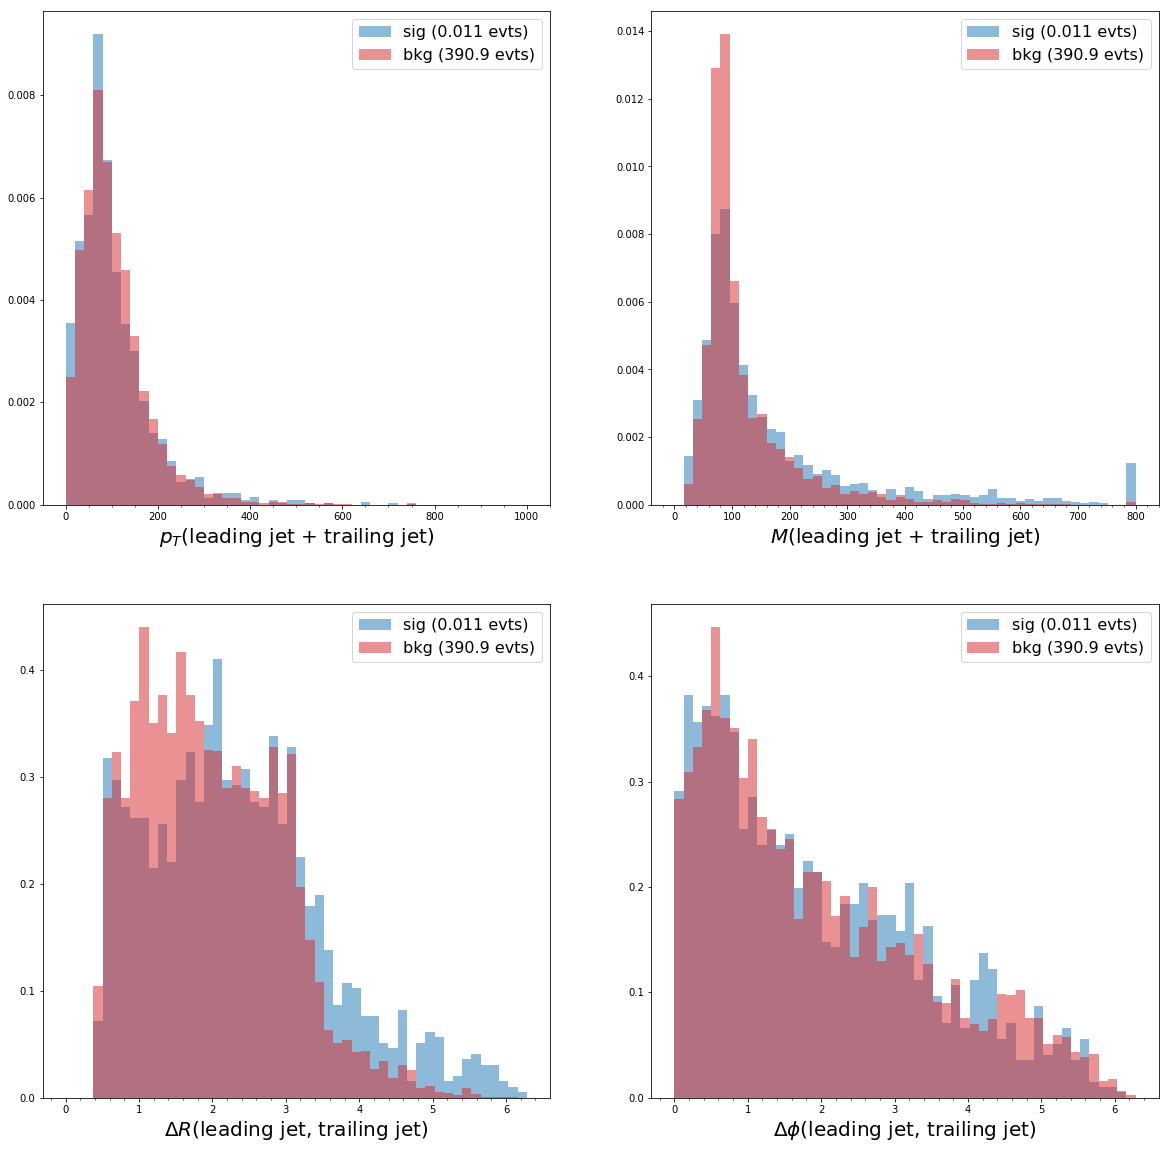

In [34]:
plot_hypothesis(df, "W")

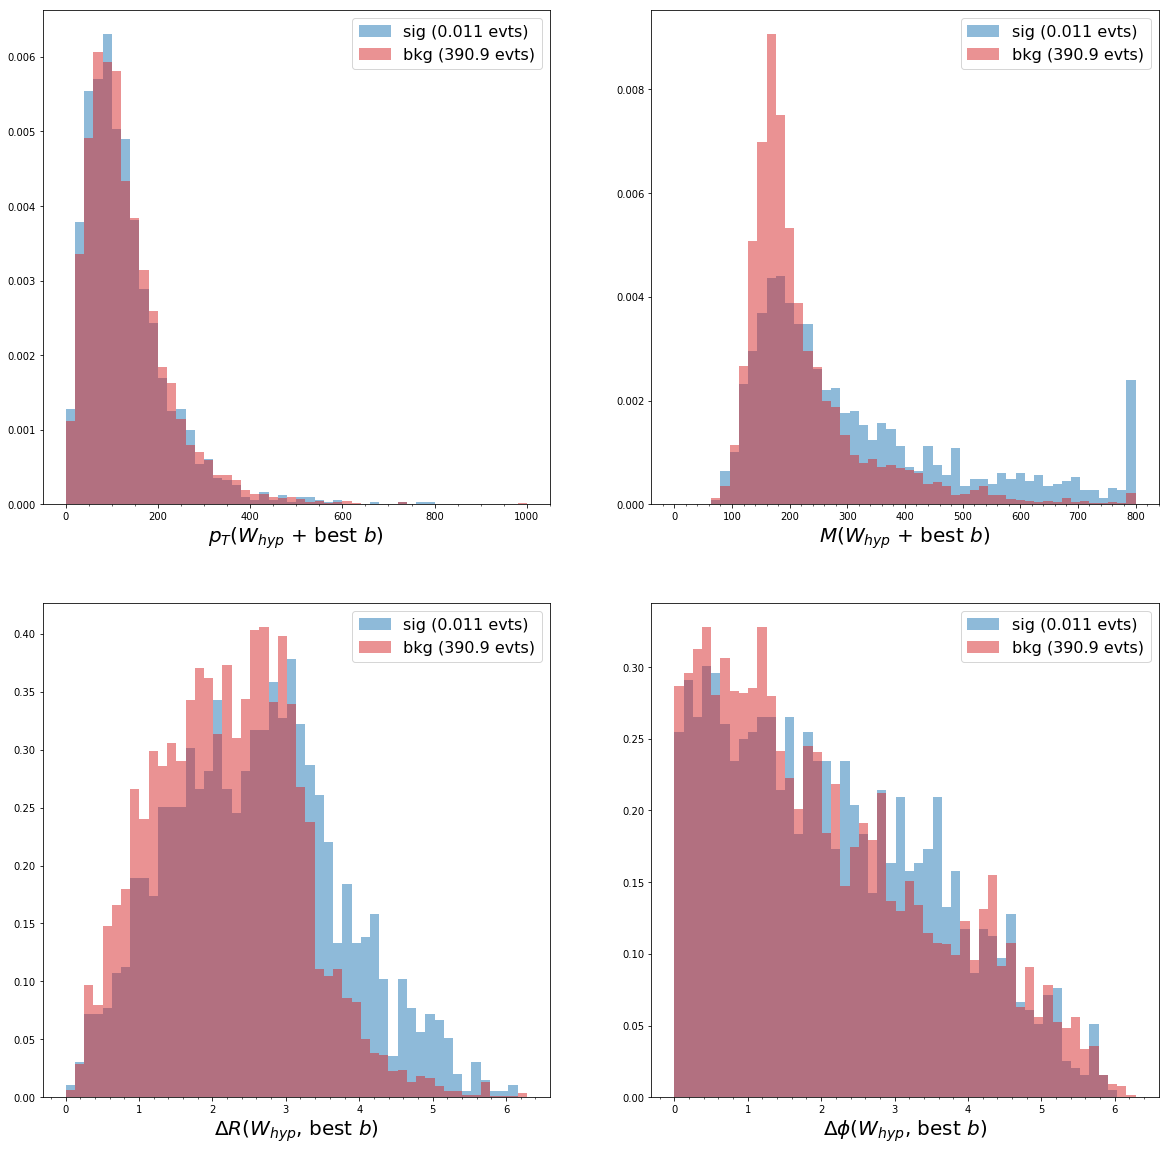

In [35]:
plot_hypothesis(df, "t_to_W_b")

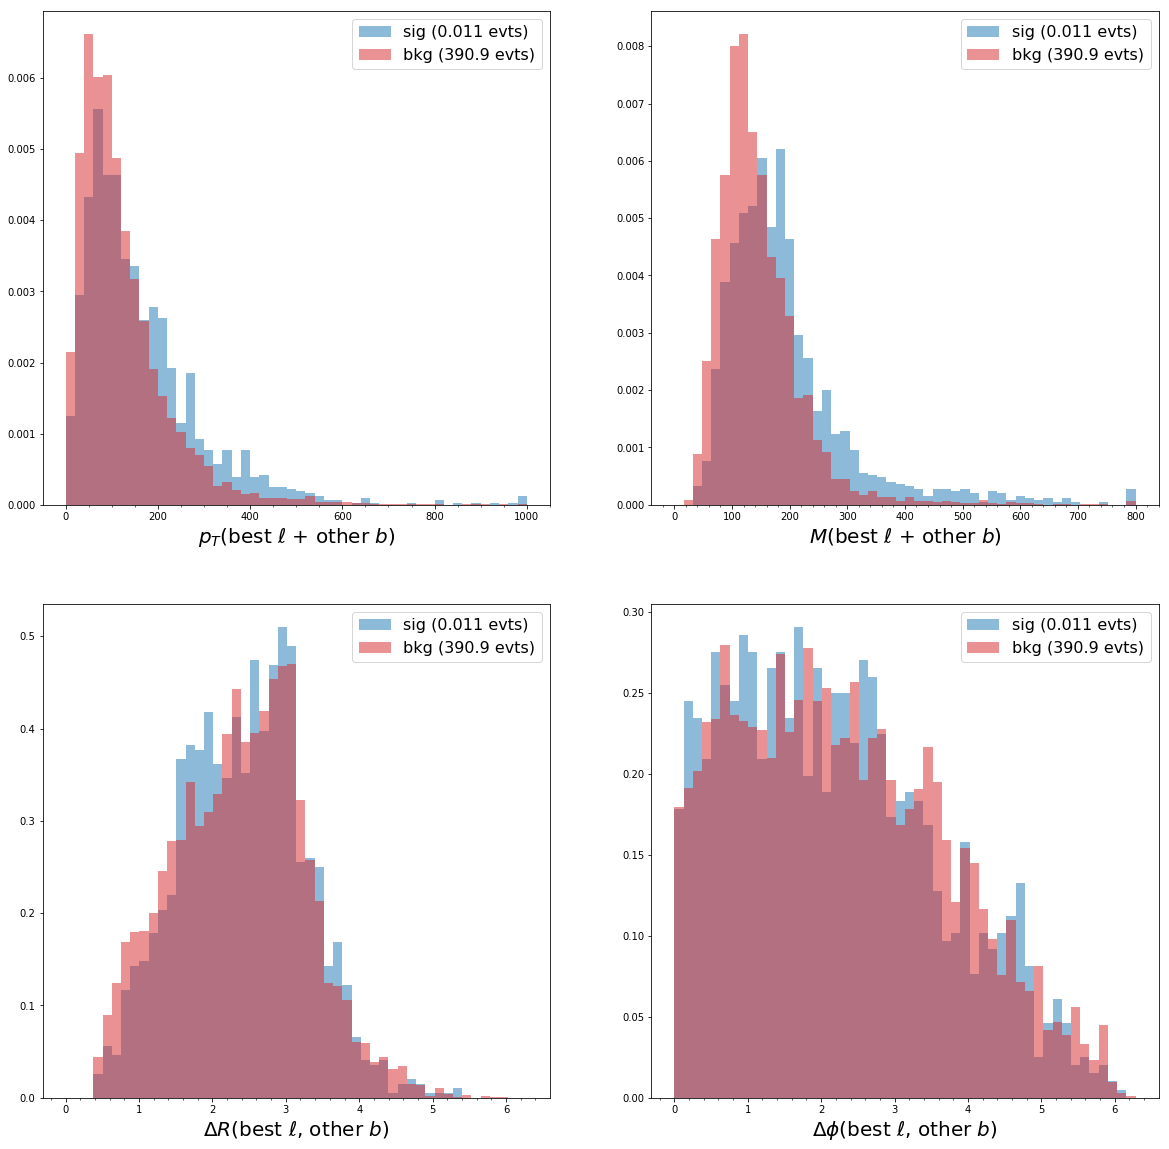

In [36]:
plot_hypothesis(df, "t_to_lep_b")

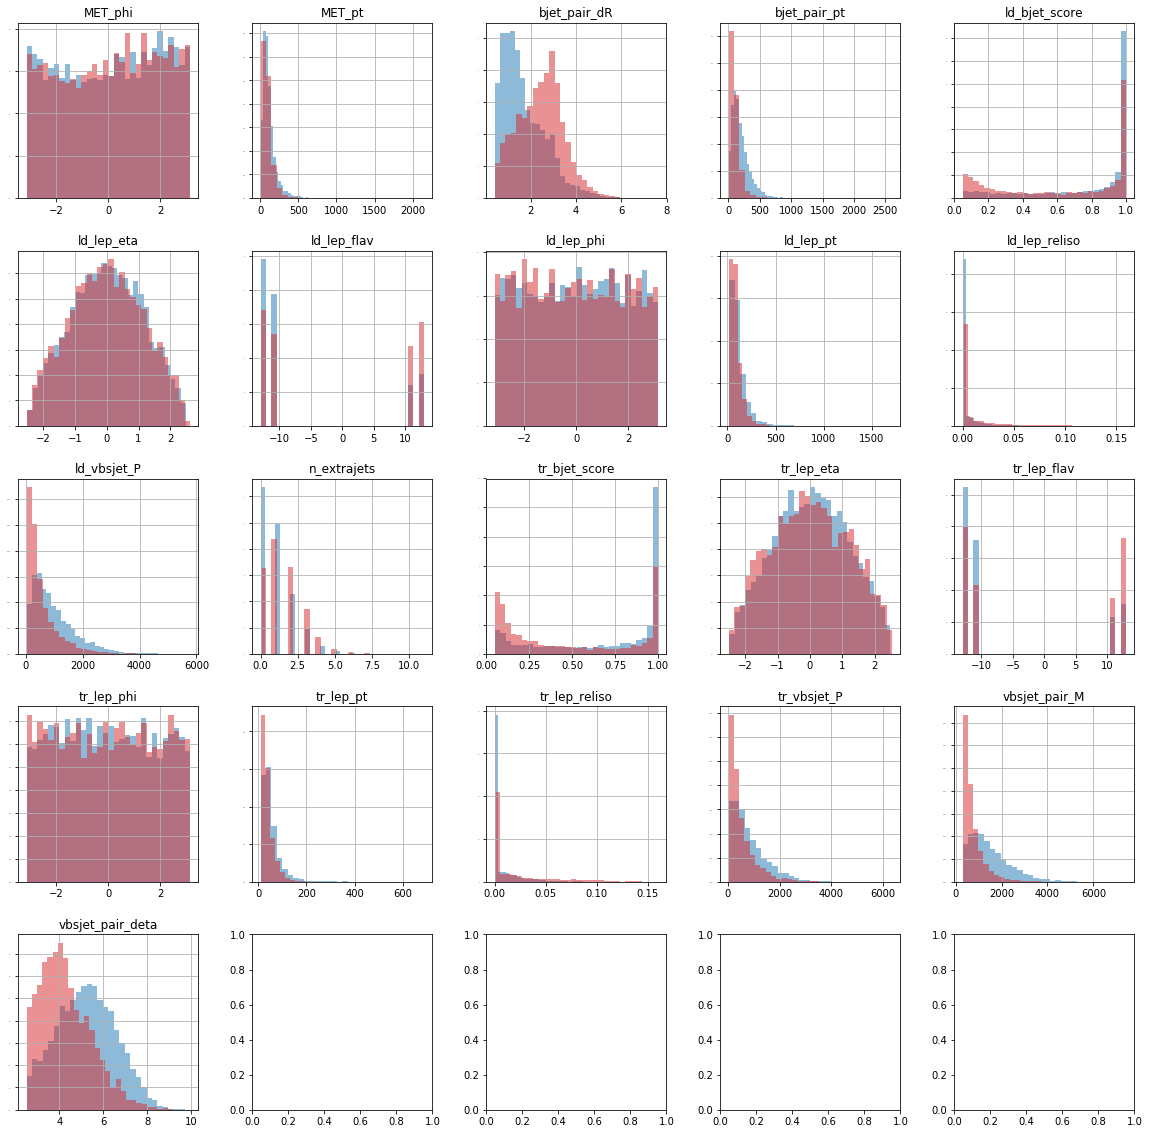

In [37]:
fig, axes = plt.subplots(5,5,figsize=(20,20))

extrajet_agnostic_cols = list(set(df.columns[~is_geq2extrajets_col & ~is_lt2extrajets_col])-set(excludes))

df[df.is_signal][extrajet_agnostic_cols].hist(
    ax=axes.flatten()[:len(extrajet_agnostic_cols)], 
    weights=df[df.is_signal].event_weight,
    alpha=0.5, 
    color="C0", 
    ylabelsize=0, 
    density=True, 
    bins=30
);
df[~df.is_signal][extrajet_agnostic_cols].hist(
    ax=axes.flatten()[:len(extrajet_agnostic_cols)], 
    weights=df[~df.is_signal].event_weight,
    alpha=0.5, 
    color="C3", 
    ylabelsize=0, 
    density=True, 
    bins=30
);
for row in axes:
    for col in row:
        col.set_ylim(bottom=0.)

In [38]:
def plot_MET_and_bjets(df):
    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    # Unpack axes
    ax1, ax2 = axes[0]
    ax3, ax4 = axes[1]
    # Make signal/bkg selections
    sig = (df.is_signal)
    bkg = (~df.is_signal)
    # Plot pt (upper left)
    plot_S_vs_B(df, "MET_pt", sig, bkg, bins=np.linspace(0, 500, 51), axes=ax1)
    ax1.set_xlabel(r"MET $p_{T}$", size=20);
    # Plot M (upper right)
    plot_S_vs_B(df, "MET_phi", sig, bkg, bins=np.linspace(-np.pi, np.pi, 51), axes=ax2)
    ax2.set_xlabel(r"MET $\phi$", size=20);
    # Plot dR (lower left)
    plot_S_vs_B(df, "bjet_pair_pt", sig, bkg, bins=np.linspace(0, 500, 51), axes=ax3)
    ax3.set_xlabel(r"$p_{T}$(%s, %s)" % ("leading b", "trailing b"), size=20);
    # Plot dphi (lower right)
    plot_S_vs_B(df, "bjet_pair_dR", sig, bkg, bins=np.linspace(0, 2*np.pi, 51), axes=ax4)
    ax4.set_xlabel(r"$\Delta R$(%s, %s)" % ("leading b", "trailing b"), size=20);

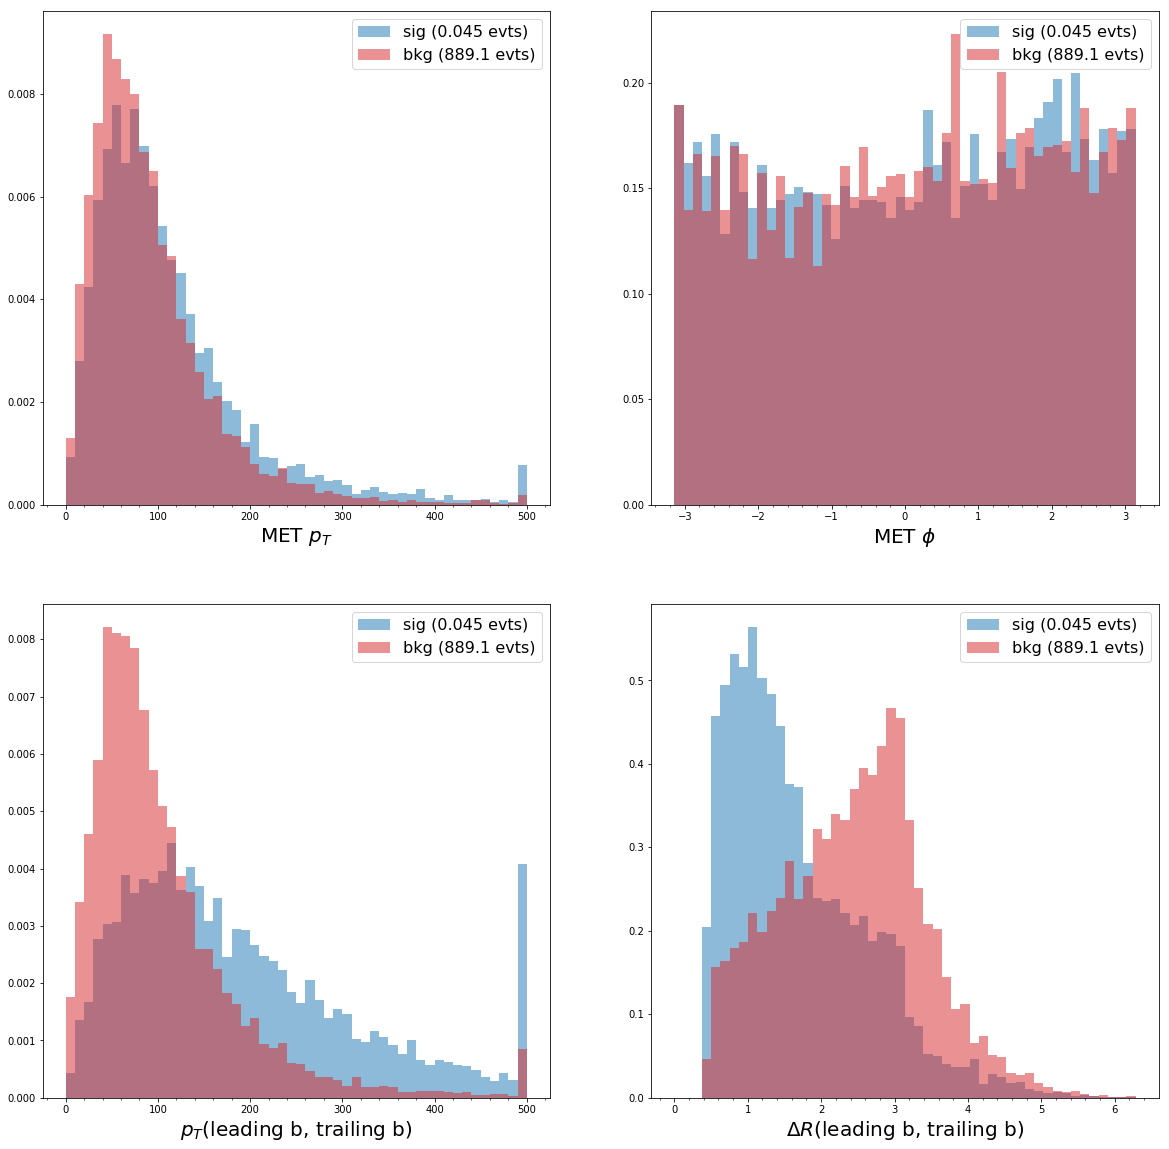

In [39]:
plot_MET_and_bjets(df)

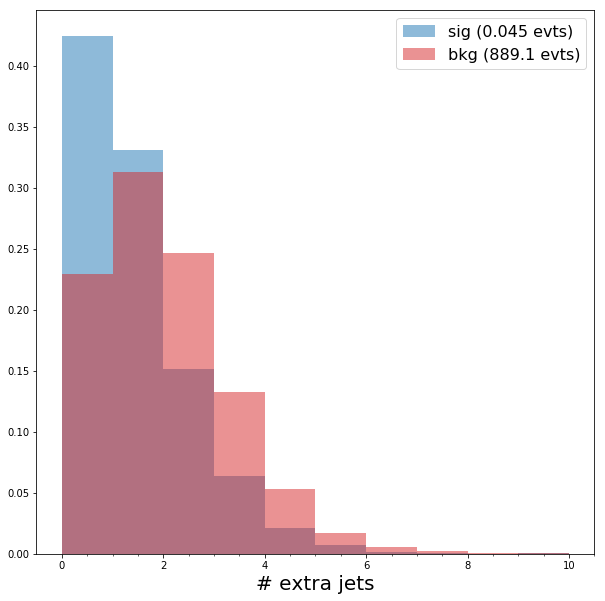

In [40]:
fig, axes = plt.subplots(figsize=(10,10))

plot_S_vs_B(df, "n_extrajets", df.is_signal, ~df.is_signal, bins=np.linspace(0,10,11), axes=axes)
axes.set_xlabel("# extra jets", size=20);